<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/Mamani_JoseLuis_Eva_Parte01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análisis y Preparación de Datos

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
# -------------------------
# 1. Cargar y unir datasets
# -------------------------
df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")
df = pd.concat([df1, df2], ignore_index=True)


In [10]:
# -------------------------
# 3. Análisis Exploratorio (EDA)
# -------------------------
print("Resumen de datos:")
print(df.info())
print("\nValores nulos:")
print(df.isnull().sum())
print("\nResumen estadístico:")
print(df.describe(include='all'))

Resumen de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3898 non-null   object        
 1   datetime     3898 non-null   datetime64[ns]
 2   cash_type    3898 non-null   object        
 3   card         3547 non-null   object        
 4   money        3898 non-null   float64       
 5   coffee_name  3898 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 182.8+ KB
None

Valores nulos:
date             0
datetime         0
cash_type        0
card           351
money            0
coffee_name      0
dtype: int64

Resumen estadístico:
              date                       datetime cash_type  \
count         3898                           3898      3898   
unique         381                            NaN         2   
top     2025-02-26                            NaN   

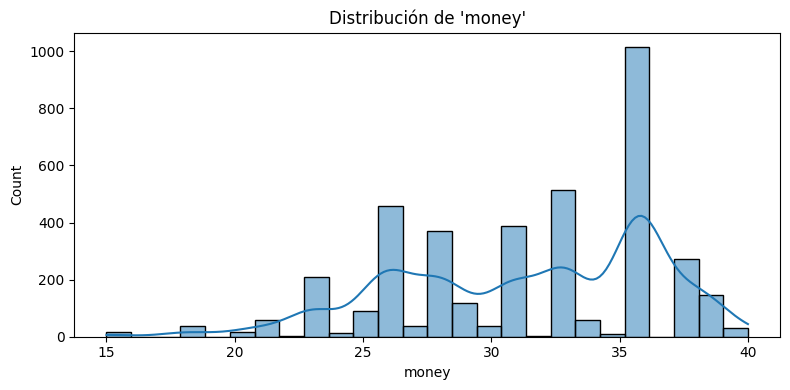

In [11]:
# Visualización: Distribución de 'money'
plt.figure(figsize=(8, 4))
sns.histplot(df['money'], kde=True)
plt.title("Distribución de 'money'")
plt.xlabel("money")
plt.tight_layout()
plt.show()


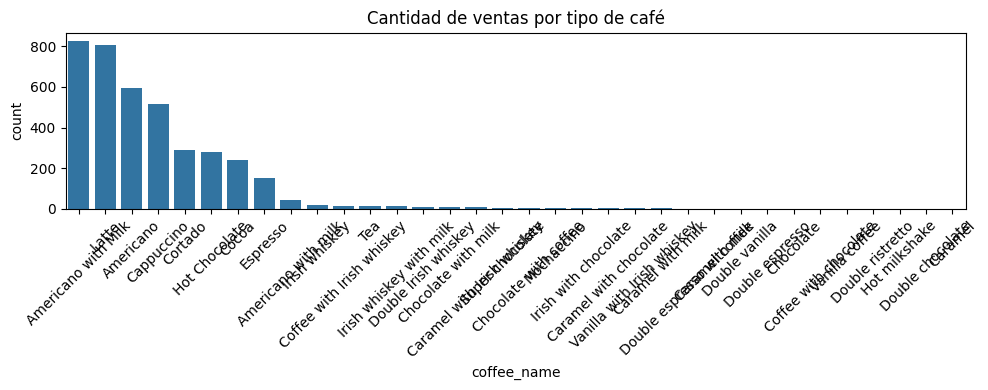

In [12]:
# Visualización: Conteo de tipos de café
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title("Cantidad de ventas por tipo de café")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:

# -------------------------
# 4. Ingeniería de Características
# -------------------------
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek
df['hora'] = df['datetime'].dt.hour
df['fecha'] = df['datetime'].dt.date
# Cantidad total vendida por día
ventas_por_dia = df.groupby('fecha')['money'].sum().reset_index(name='cantidad_total_vendida_no_dia')
df = pd.merge(df, ventas_por_dia, on='fecha', how='left')

,date,datetime,cash_type,card,money,coffee_name,mes,dia_semana,hora,fecha,cantidad_total_vendida_no_dia_x,cantidad_total_vendida_no_dia_y
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,4,10,2024-03-01,396.30,396.30
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,4,12,2024-03-01,396.30,396.30
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,4,12,2024-03-01,396.30,396.30
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,4,13,2024-03-01,396.30,396.30
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,4,13,2024-03-01,396.30,396.30
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46.000,cash,NaN,30.0,Cappuccino,3,6,14,2025-03-23,419.76,419.76
3894,2025-03-23,2025-03-23 15:15:36.000,card,NaN,25.0,Irish whiskey,3,6,15,2025-03-23,419.76,419.76
3895,2025-03-23,2025-03-23 17:59:25.000,card,NaN,28.0,Super chocolate,3,6,17,2025-03-23,419.76,419.76
3896,2025-03-23,2025-03-23 18:01:33.000,card,NaN,28.0,Vanilla with Irish whiskey,3,6,18,2025-03-23,419.76,419.76


In [15]:
# -------------------------
# 5. One-Hot Encoding
# -------------------------
df_encoded = pd.get_dummies(df, columns=['cash_type', 'coffee_name'], drop_first=True)

In [17]:
# -------------------------
# 6. Preparar y dividir datos
# -------------------------
X = df_encoded.drop(columns=['money', 'datetime', 'date', 'fecha', 'card'])
y = df_encoded['money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")

Tamaño entrenamiento: (3118, 38)
Tamaño prueba: (780, 38)


# 2. Modelado Predictivo (con TensorFlow Keras)



In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Supongamos que tus datos ya están listos
# X_train, X_test, y_train, y_test son el conjunto limpio y dividido

# Construir modelo
modelo_total = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Predicción de una sola variable
])

modelo_total.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelo_total.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluación
y_pred = modelo_total.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 171875.5469 - mae: 380.8075 - val_loss: 150271.7500 - val_mae: 347.1969
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 127318.0000 - mae: 315.7067 - val_loss: 65573.0859 - val_mae: 202.0971
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49088.4766 - mae: 172.1293 - val_loss: 38645.5000 - val_mae: 158.2597
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38413.0156 - mae: 156.5580 - val_loss: 38388.7734 - val_mae: 157.2275
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37703.6680 - mae: 152.5919 - val_loss: 38120.2109 - val_mae: 157.3992
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36030.2500 - mae: 150.8732 - val_loss: 37870.6328 - val_mae: 156.7467
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37977.2812 - mae: 155.3592 - val_loss: 37655.9766 - val_mae: 156.5135
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36009.9297 - mae: 150.0566 - val_loss: 37456.6641 - 

In [44]:
pivot_df = df.groupby(['date', 'coffee_name'])['money'].sum().unstack().fillna(0).reset_index()
pivot_df = pivot_df.merge(df[['date', 'hora', 'mes', 'dia_semana']].drop_duplicates(), on='date')

# Codificar variables
pivot_df = pd.get_dummies(pivot_df, columns=['mes', 'dia_semana'])

# Separar features y targets
X_multi = pivot_df.drop(columns=['date'] + list(df['coffee_name'].unique()))
y_multi = pivot_df[df['coffee_name'].unique()]

In [60]:
# Unimos y limpiamos datos de entrenamiento
train_data = pd.concat([X_train_m, y_train_m], axis=1).dropna()
X_train_m = train_data.iloc[:, :X_train_m.shape[1]]
y_train_m = train_data.iloc[:, X_train_m.shape[1]:]

# Lo mismo con los datos de prueba
test_data = pd.concat([X_test_m, y_test_m], axis=1).dropna()
X_test_m = test_data.iloc[:, :X_test_m.shape[1]]
y_test_m = test_data.iloc[:, X_test_m.shape[1]:]



In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

In [62]:
from tensorflow.keras import models, layers

modelo_multi = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_m_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train_m.shape[1])
])

modelo_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelo_multi.fit(X_train_m_scaled, y_train_m, epochs=50, validation_split=0.2)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1290.7064 - mae: 11.8957 - val_loss: 1107.6423 - val_mae: 11.4602
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1134.4183 - mae: 11.6083 - val_loss: 789.0308 - val_mae: 10.2064
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 776.9465 - mae: 10.2229 - val_loss: 547.8331 - val_mae: 9.3670
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 548.2506 - mae: 9.4490 - val_loss: 509.8460 - val_mae: 9.2127
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 526.8008 - mae: 9.2811 - val_loss: 500.7550 - val_mae: 8.8863
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 507.5545 - mae: 9.0709 - val_loss: 490.2824 - val_mae: 8.8578
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 482.6938 - mae: 8.9353 - val_loss: 480.4013 - val_mae: 8.8542
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 498.8621 - mae: 9.0891 - val_loss: 469.8408 - val_mae: 8.6783
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━

In [63]:
y_pred_multi = modelo_multi.predict(X_test_m_scaled)

y_test_np = y_test_m.to_numpy()
mask = ~np.isnan(y_test_np).any(axis=1) & ~np.isnan(y_pred_multi).any(axis=1)
y_test_clean = y_test_np[mask]
y_pred_clean = y_pred_multi[mask]


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_clean, y_pred_clean)
mse = mean_squared_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_clean, y_pred_clean)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 7.923821879740807
MSE: 378.4922700072793
RMSE: 19.4548777947146
R²: 0.09120794813821453


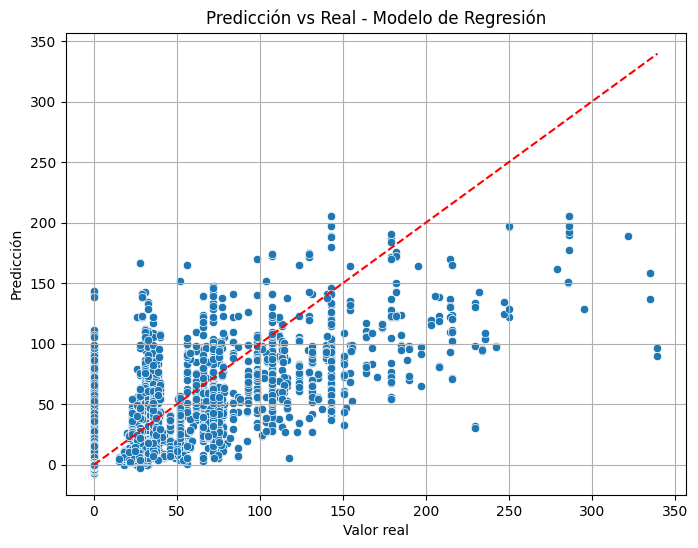

In [65]:
y_test_1d = y_test_clean.flatten()
y_pred_1d = y_pred_clean.flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_1d, y=y_pred_1d)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicción vs Real - Modelo de Regresión")
plt.plot([y_test_1d.min(), y_test_1d.max()], [y_test_1d.min(), y_test_1d.max()], 'r--')  # línea ideal
plt.grid(True)
plt.show()

# 3. Serialización del Modelo


In [66]:
# Guardar modelo multi-output en formato moderno
modelo_multi.save("modelo_multi.keras")


In [69]:
from google.colab import files

files.download("modelo_multi.keras")
files.download("scaler_X.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: esta bien lo que hice

train_data = pd.concat([X_train_m, y_train_m], axis=1).dropna()
X_train_m = train_data.iloc[:, :X_train_m.shape[1]]
y_train_m = train_data.iloc[:, X_train_m.shape[1]:]
# ... and similar for test_data